# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [126]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [127]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [128]:
data_df = pd.read_csv('Data/DataClean.csv')

In [129]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        72 non-null     int64  
 1   text                           72 non-null     object 
 2   post_text                      72 non-null     object 
 3   original_text                  4 non-null      object 
 4   time                           72 non-null     object 
 5   timestamp                      72 non-null     int64  
 6   image                          69 non-null     object 
 7   image_lowquality               72 non-null     object 
 8   images                         72 non-null     object 
 9   images_description             72 non-null     object 
 10  images_lowquality              72 non-null     object 
 11  images_lowquality_description  72 non-null     object 
 12  video                          2 non-null      objec

# Lấy chủ đề của các bài đăng

In [130]:
df_text = data_df[['post_id','post_text']]

df_text

,post_id,post_text
0,897003055122107,Mới được có 9 thôi mà đã nở nụ cười mãn nguyện...
1,896955408460205,=THÔNG TIN ONE PIECE CHƯƠNG 1100=\n\n- Saturn ...
2,896673808488365,=ONE PIECE CHƯƠNG 1100 SẼ CÓ GÌ?=\n\nChương tớ...
3,896504341838645,"Bonney, người cứu rỗi Kuma và cả sự u ám của p..."
4,896162908539455,"Anime 2 tập vừa rồi thực sự làm rất tốt, nó nh..."
...,...,...
67,885537019602044,"Cảnh này lên Anime cũng rất hay, cả Luffy lẫn ..."
68,885488969606849,"""Cút"""
69,885171226305290,"Con nhà tông <("")\n-Franky-"
70,884994929656253,"Adu anh em, cha mẹ Sabo <("")\n-Franky-\n\nAdu ..."


# Tổng lượt tương tác của tất cả các bài

In [131]:
total_reactions = data_df[['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry', 'shares', 'comments']].sum()

total_reactions

like        258303.0
love         14295.0
haha         64294.0
wow            928.0
care          1036.0
sad          24771.0
angry          122.0
shares        3044.0
comments     16576.0
dtype: float64

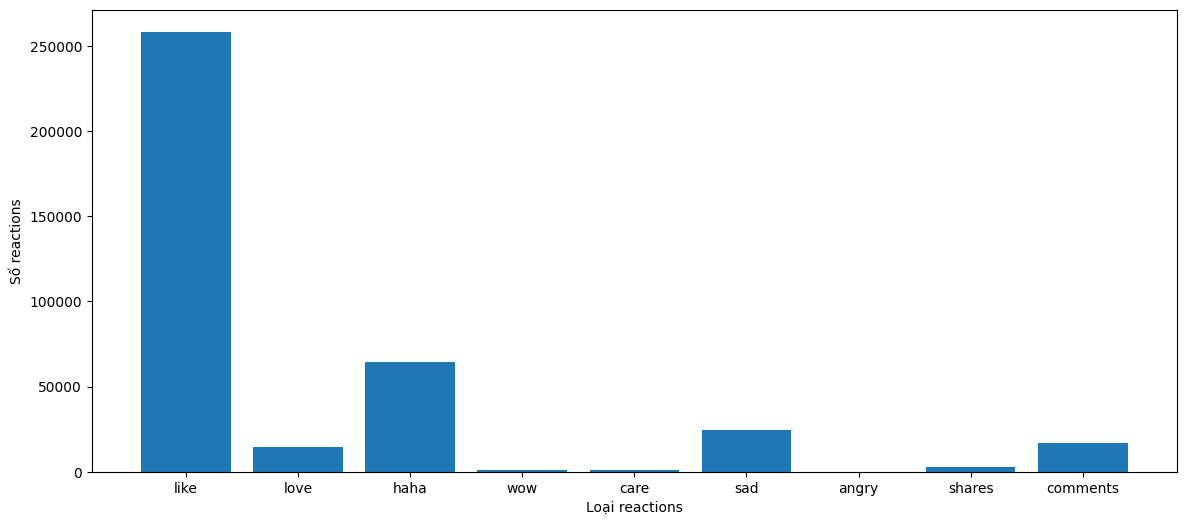

In [132]:
plt.figure(figsize=(14, 6))

plt.bar(total_reactions.index, total_reactions.values)

plt.ylabel('Số reactions')

plt.xlabel('Loại reactions')

plt.show()

# Bài viết có lượt tương tác nhỏ nhất

In [133]:


# Tinh tong luot tuong tac cua moi bai dang
data_df['total_interactions'] = data_df['comments'] + data_df['reaction_count'] + data_df['shares']

# Sap xep data theo tong luot tuong tac giam dan
sort_data = data_df.sort_values(by='total_interactions', ascending=True)

# Lay thong tin cua bai dang co tong luot tuong tac nho nhat
most_interactions_post = sort_data.iloc[0]

# Lay thong tin tung loai tuong tac
interactions_info = most_interactions_post[['like', 'love','care', 'haha', 'wow', 'sad', 'angry', 'comments', 'shares']]

# In thong tin bai dang
print("Thông tin bài viết có lượt tương tác nhỏ nhất:")

print(most_interactions_post[['post_id', 'time','total_interactions']])

print("\nThông tin từng loại tương tác:")

print(interactions_info)

Thông tin bài viết có lượt tương tác nhỏ nhất:
post_id                   886169359538810
time                  2023-11-06 19:50:15
total_interactions                   1017
Name: 63, dtype: object

Thông tin từng loại tương tác:
like        915.0
love         30.0
care          5.0
haha          0.0
wow           5.0
sad           5.0
angry         0.0
comments       45
shares         12
Name: 63, dtype: object


# Bài viết có lượt tương tác lớn nhất

In [134]:
# Tinh tong luot tuong tac cua moi bai dang
data_df['total_interactions'] = data_df['comments'] + data_df['reaction_count'] + data_df['shares']

# Sap xep data theo tong luot tuong tac giam dan
sort_data = data_df.sort_values(by='total_interactions', ascending=False)

# Lay thong tin cua bai dang co tong luot tuong tac lon nhat
most_interactions_post = sort_data.iloc[0]

# Lay thong tin tung loai tuong tac
interactions_info = most_interactions_post[['like', 'love', 'haha', 'care', 'wow', 'sad', 'angry', 'comments', 'shares']]

# In thong tin bai dang
print("Thông tin bài đăng có lượt tương tác lớn nhất:")

print(most_interactions_post[['post_id', 'time','total_interactions']])

print("\nThông tin từng loại tương tác:")

print(interactions_info)
    

Thông tin bài đăng có lượt tương tác lớn nhất:
post_id                   889492209206525
time                  2023-11-13 09:43:39
total_interactions                  16174
Name: 40, dtype: object

Thông tin từng loại tương tác:
like        8965.0
love          64.0
haha        6527.0
care          20.0
wow           19.0
sad           64.0
angry          1.0
comments       457
shares          57
Name: 40, dtype: object


# Mốc thời gian mà Fanpage thường xuyên đăng bài 

In [135]:
# Tong so bai dang theo gio
total_number_of_posts_by_hour = data_df['hour'].value_counts()

total_number_of_posts_by_hour = total_number_of_posts_by_hour.reindex(range(24), fill_value=0)

total_number_of_posts_by_hour

hour
0      0
1      0
2      0
3      0
4      0
5      0
6      3
7      0
8      9
9      7
10     6
11     3
12     7
13     2
14     0
15     1
16     6
17     6
18     5
19    10
20     2
21     2
22     3
23     0
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

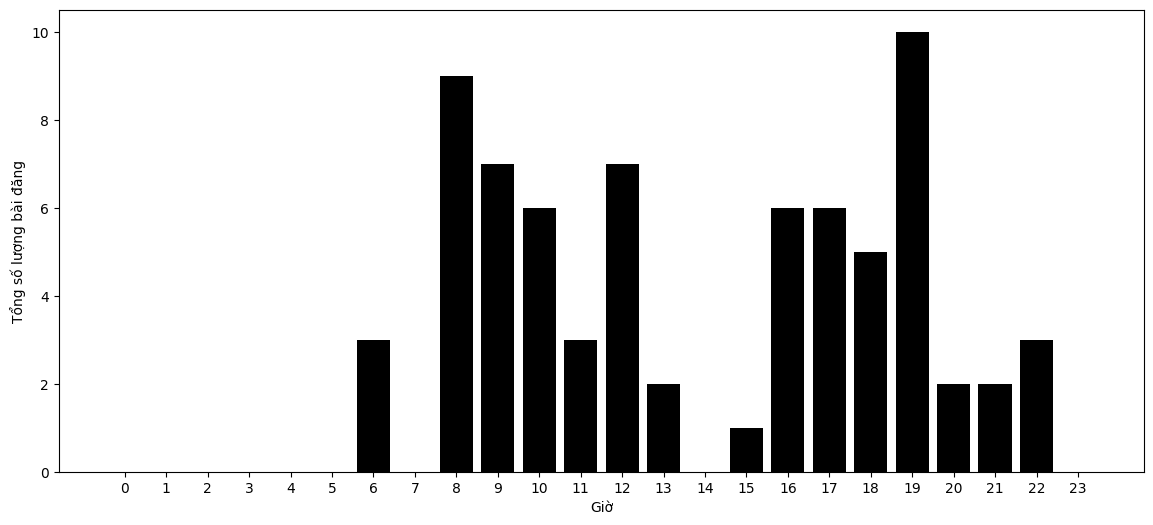

In [136]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.bar(total_number_of_posts_by_hour.index, total_number_of_posts_by_hour.values, color='Black')

ax.set_xticks(total_number_of_posts_by_hour.index)

plt.ylabel('Tổng số lượng bài đăng')

plt.xlabel('Giờ')

plt.show

# Mốc thời gian người dùng Facebook tương tác

In [137]:
# Tong so tuong tac theo gio
total_reactions_by_hour = data_df.groupby('hour')['reaction_count'].sum()

total_reactions_by_hour = total_reactions_by_hour.reindex(range(24), fill_value=0)

total_reactions_by_hour

hour
0         0
1         0
2         0
3         0
4         0
5         0
6     19751
7         0
8     70897
9     39911
10    20827
11     9954
12    50587
13     8628
14        0
15     9412
16    30243
17    23761
18    26804
19    28999
20     5103
21     5664
22    13208
23        0
Name: reaction_count, dtype: int64

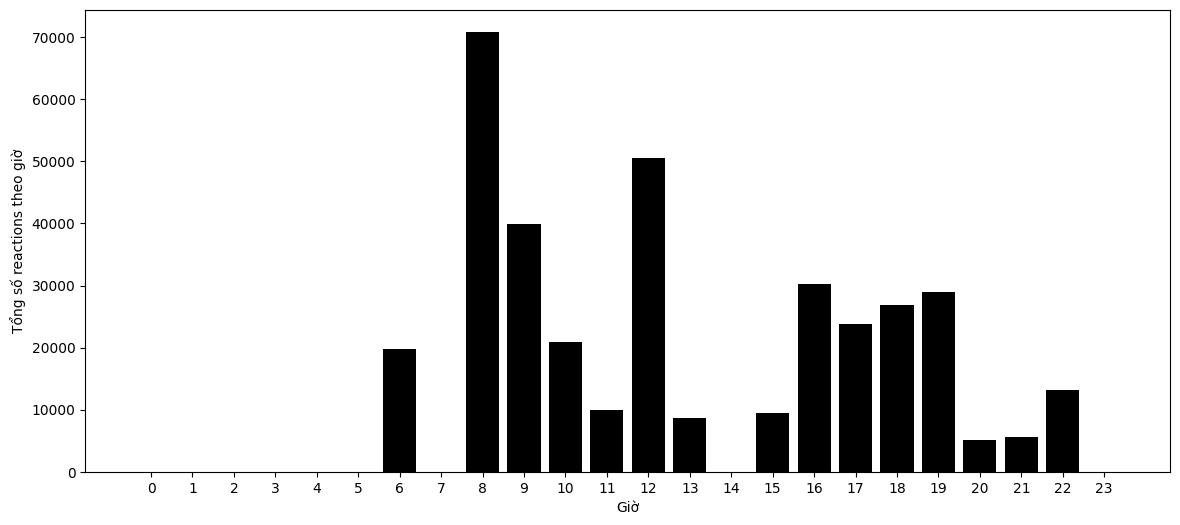

In [138]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.bar(total_reactions_by_hour.index, total_reactions_by_hour.values, color='Black')

ax.set_xticks(total_reactions_by_hour.index)

plt.xlabel('Giờ')

plt.ylabel('Tổng số reactions theo giờ')

plt.show()


# Sự thay đổi số lượt tương tác trong các bài đăng

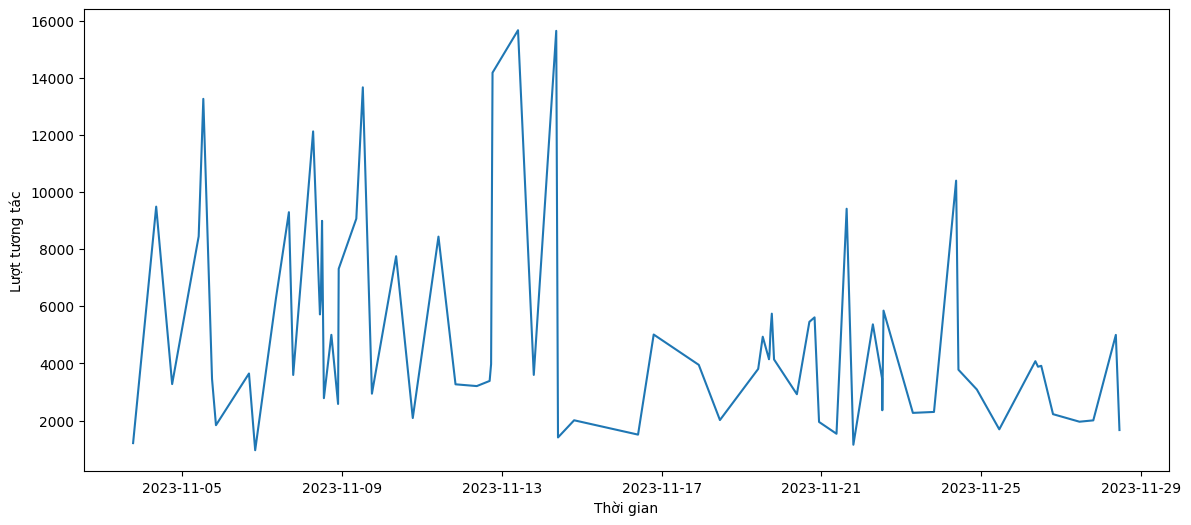

In [139]:
data_df['time'] = pd.to_datetime(data_df['time'])

plt.figure(figsize=(14, 6))

plt.plot(data_df['time'], data_df['reaction_count'])

plt.xlabel('Thời gian')

plt.ylabel('Lượt tương tác')

plt.show()

# Sự tương quan giữa reactions, shares và comments

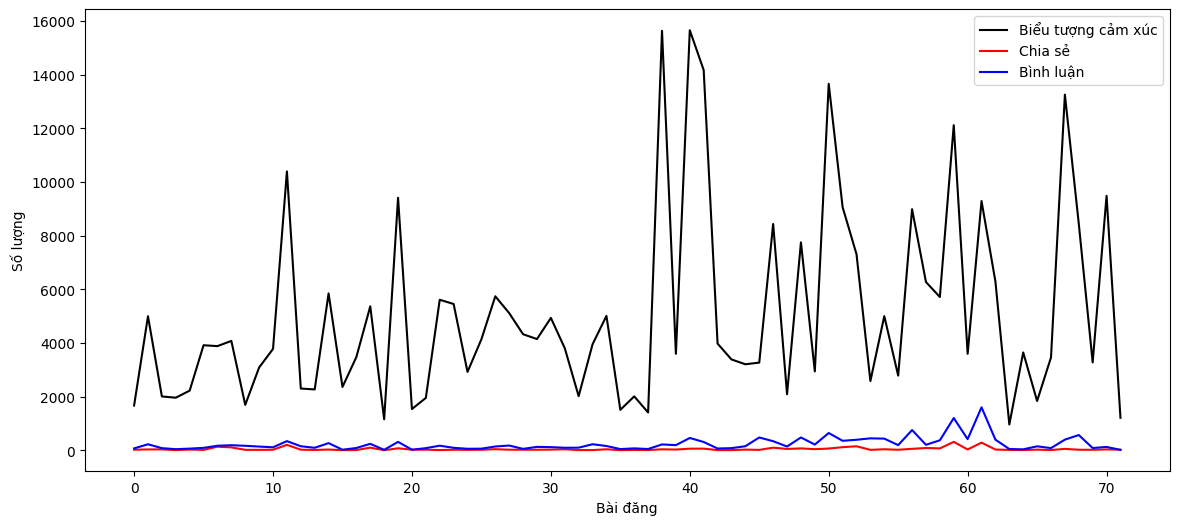

In [140]:
Y = data_df['reaction_count']

Y2 = data_df['shares'] 

Y3 = data_df['comments']
plt.figure(figsize=(14, 6))

plt.plot(np.arange(len(Y)), Y, color='Black', label='Biểu tượng cảm xúc')

plt.plot(np.arange(len(Y2)), Y2, color='Red', label='Chia sẻ')

plt.plot(np.arange(len(Y3)), Y3, color='Blue', label='Bình luận')

plt.xlabel('Bài đăng')

plt.ylabel('Số lượng')

plt.legend()

plt.show()

# Từ khóa xuất hiện nhiều nhất

In [141]:
df_text = data_df[['post_id','post_text']]

text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,897003055122107,Mới được có 9 thôi mà đã nở nụ cười mãn nguyện...
1,896955408460205,=THÔNG TIN ONE PIECE CHƯƠNG 1100=\n\n- Saturn ...
2,896673808488365,=ONE PIECE CHƯƠNG 1100 SẼ CÓ GÌ?=\n\nChương tớ...
3,896504341838645,"Bonney, người cứu rỗi Kuma và cả sự u ám của p..."
4,896162908539455,"Anime 2 tập vừa rồi thực sự làm rất tốt, nó nh..."
...,...,...
67,885537019602044,"Cảnh này lên Anime cũng rất hay, cả Luffy lẫn ..."
68,885488969606849,"""Cút"""
69,885171226305290,"Con nhà tông <("")\n-Franky-"
70,884994929656253,"Adu anh em, cha mẹ Sabo <("")\n-Franky-\n\nAdu ..."


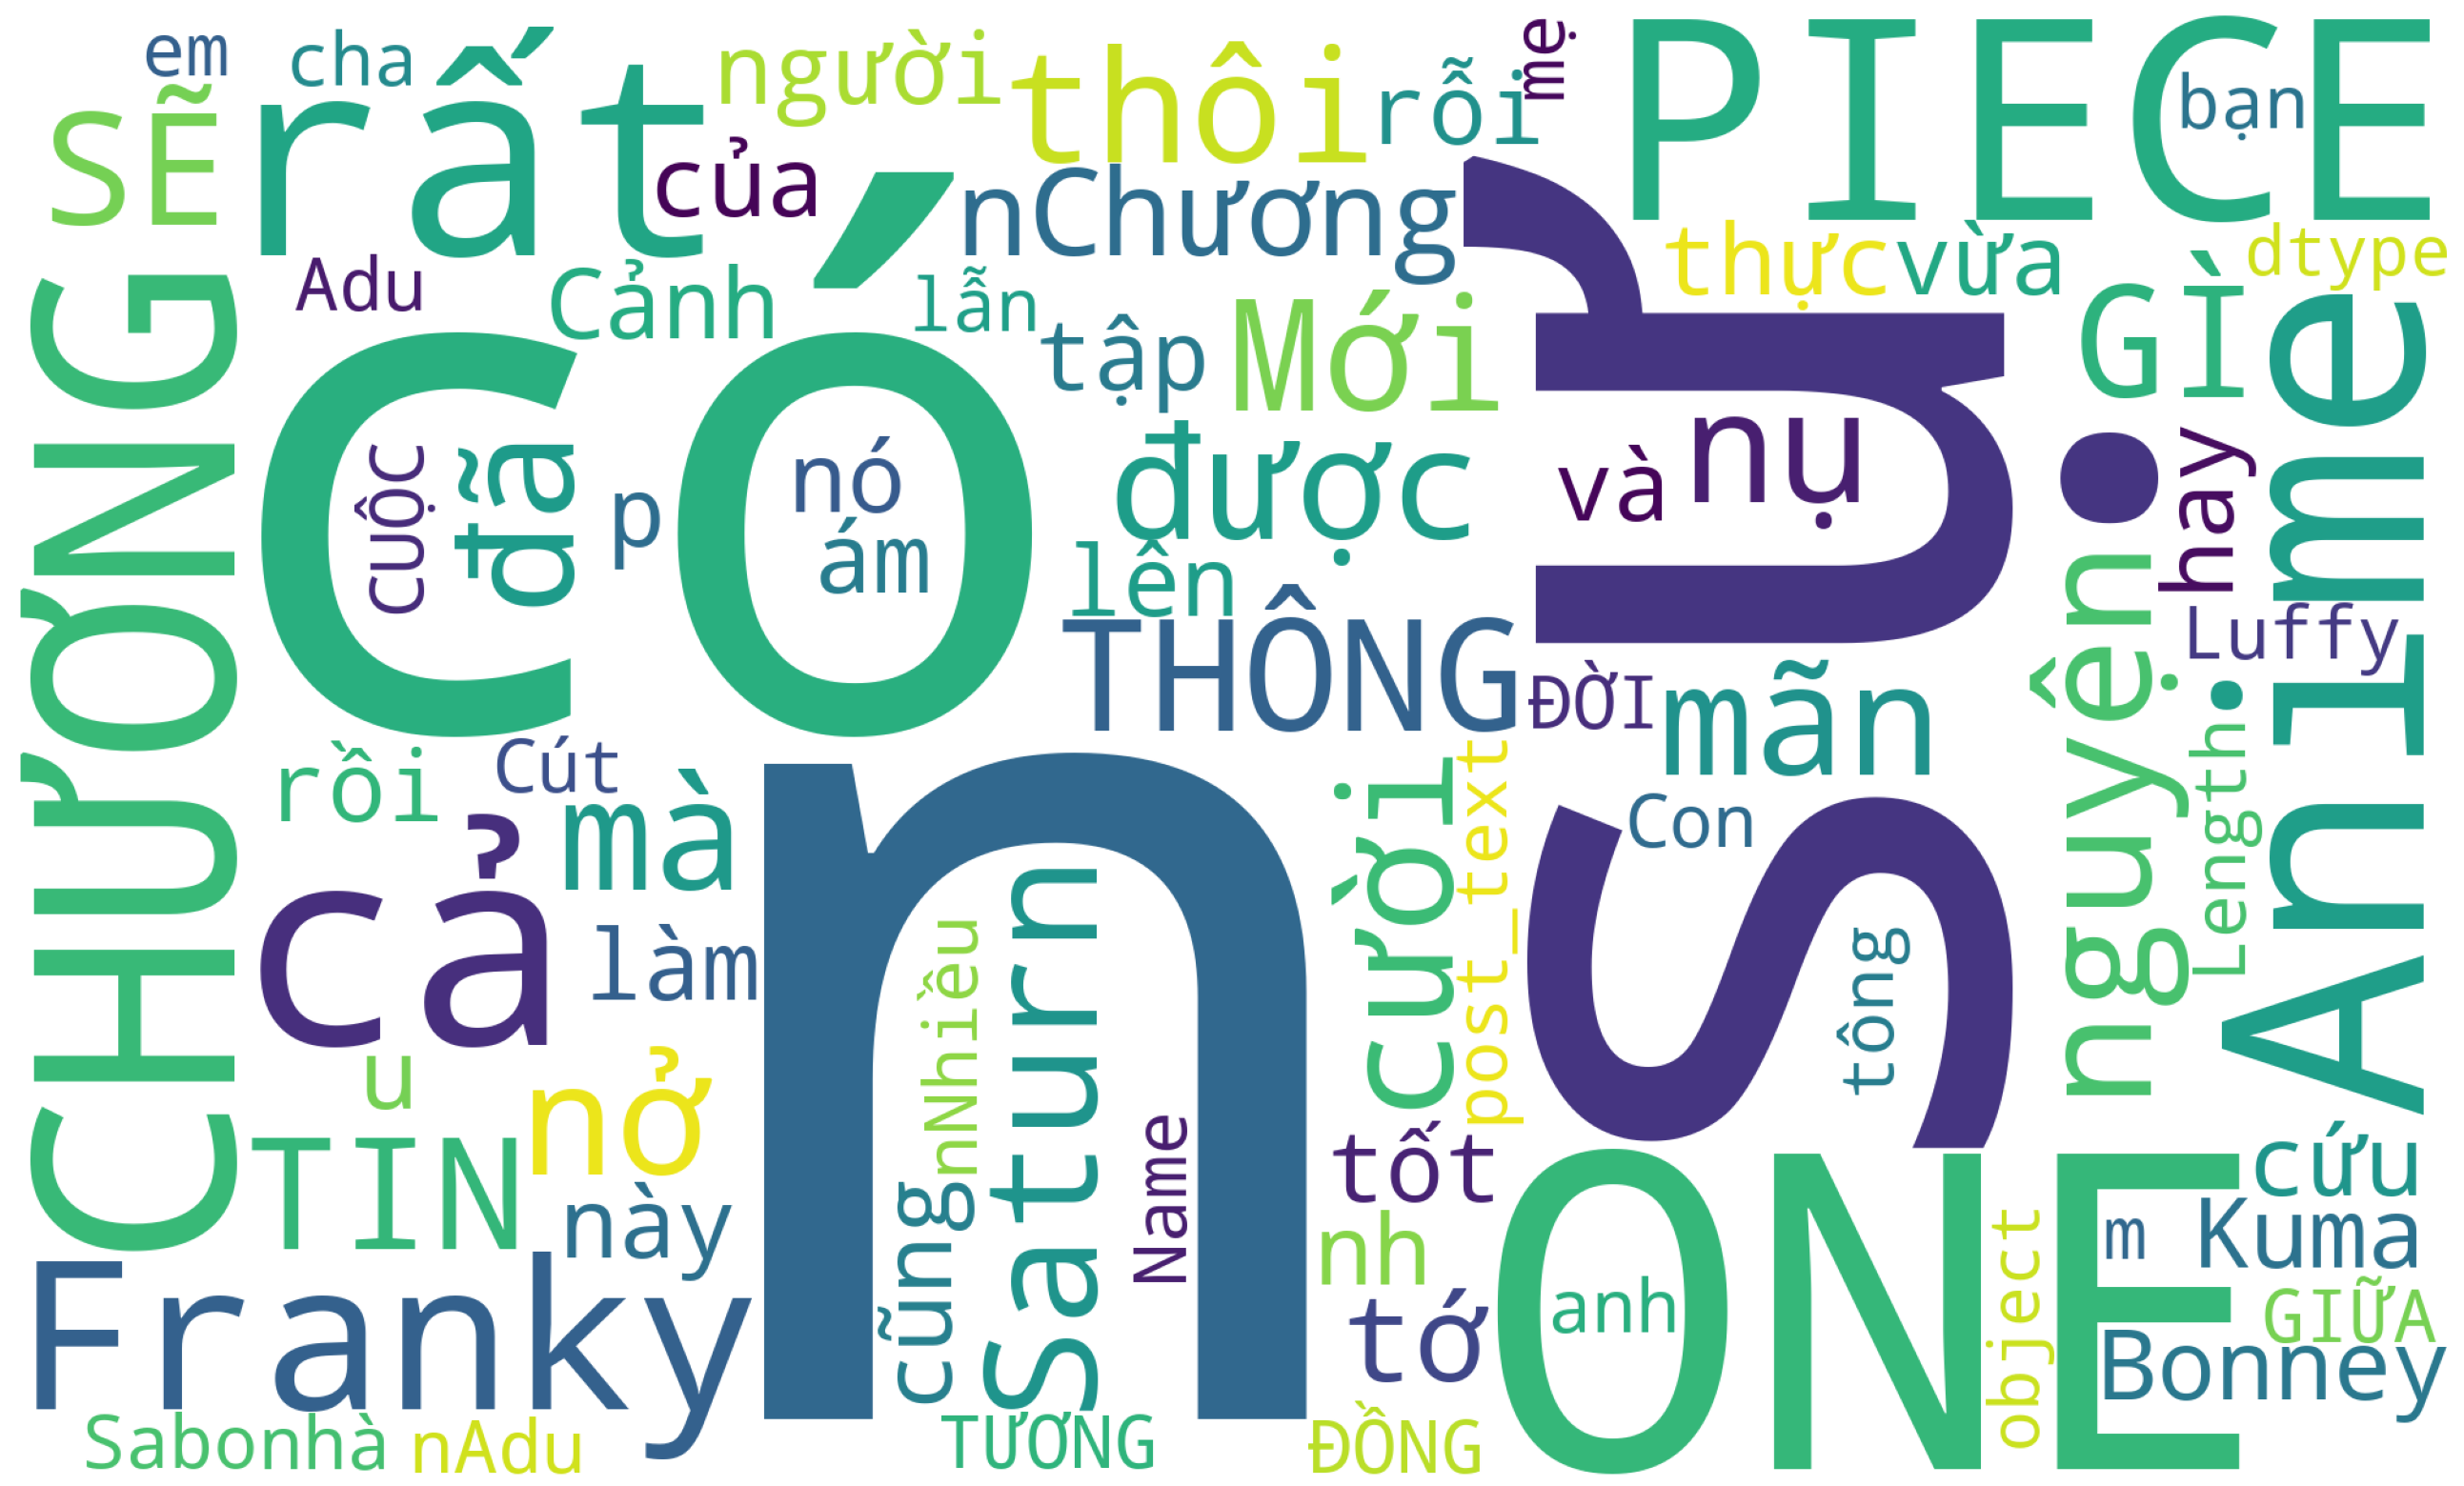

In [142]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                      
                          background_color='White', 

                      max_words=300,

                      width=2000, height=1200

                         ).generate(text)

plt.figure(figsize=(40,20))

plt.clf()

plt.imshow(wordcloud)

plt.axis('off')

plt.show()